<a href="https://colab.research.google.com/github/vishaleru/Login-and-Registration-System-/blob/main/Supervised%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP - The Spark Foundation**\
**Data Science & Business Analytics Intern**\
 **NAME : VISHAL ERUKALA**\
**Task 1:** Prediction using Supervised ML\
 **Problem statement:**\
  ● Predict the percentage of an student based on the no. of study hours.\
  ● This is a simple linear regression task as it involves just 2 variables.\
  ● You can use R, Python, SAS Enterprise Miner or any other tool\
  ● Data can be found at http://bit.ly/w-data  \
  ● What will be predicted score if a student studies for 9.25 hrs/ day?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn import model_selection
from sklearn import linear_model

In [ ]:
df=pd.read_csv("/dataset.csv")
print("Load the data")
d = df.dropna(axis = 1)
d

Load the data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
d.shape

(25, 2)

In [ ]:
d.columns

Index(['Hours', 'Scores'], dtype='object')

### **Exploring the dataset**

In [ ]:
d.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      36
23    6.9      76
24    7.8      86>

In [ ]:
d.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.520000
std,2.525094,25.260509
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
d.groupby(['Hours']).mean()

,Scores
Hours,
1.1,17.0
1.5,20.0
1.9,24.0
2.5,25.5
2.7,27.5
3.2,27.0
3.3,42.0
3.5,30.0
3.8,36.0


### **Visualizing the dataset**

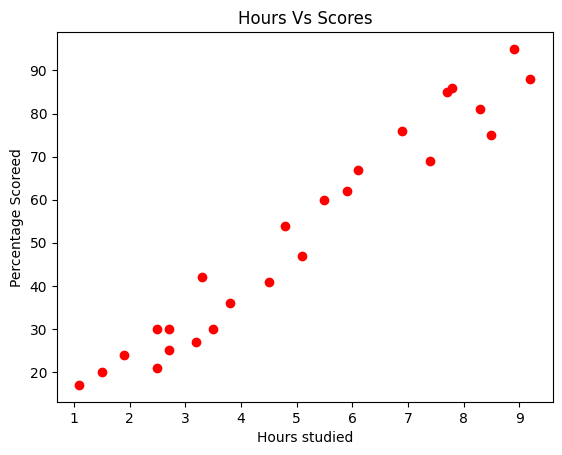

In [ ]:
plt.scatter(d['Hours'], d['Scores'], color='Red',marker='o')
plt.title("Hours Vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scoreed")
plt.show()

In [ ]:
d.corr()

,Hours,Scores
Hours,1.000000,0.976418
Scores,0.976418,1.000000


Text(0.5, 1.0, 'Plotting the regression line')

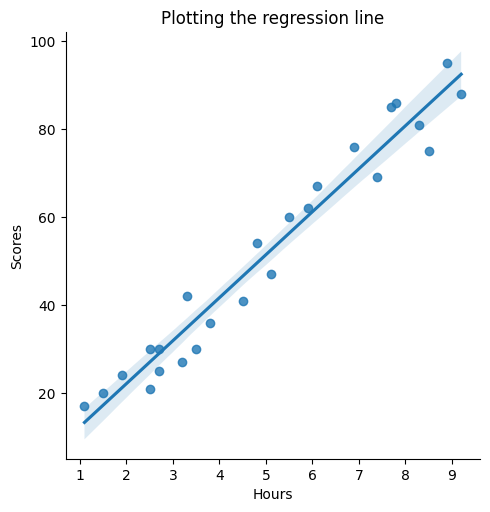

In [ ]:
sns.lmplot(x="Hours",y="Scores", data=d)
plt.title("Plotting the regression line")


In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

### **Splitting the dataset into training_data and testing_data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


,Actual
0,20
1,27
2,69
3,30
4,62
5,36
6,24
7,86


### **Training the Simple Linear Regression Model on the training_data**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

### **Comaparing the predicted_data with the actual_data**

In [ ]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,36,39.567369
6,24,20.969092
7,86,78.721636


### **Testing the model for train_data and Visualizing the train_data results**


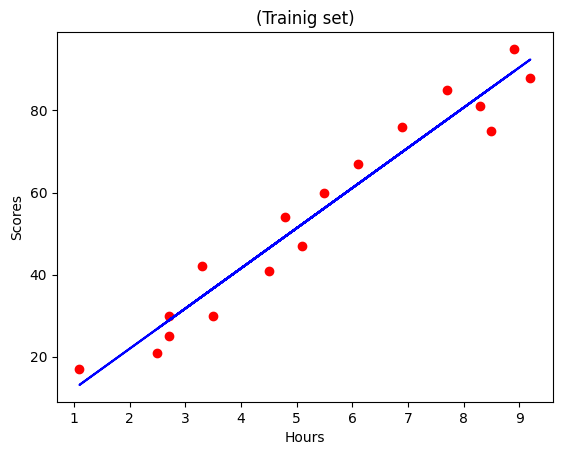

In [ ]:
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### **Testing the model for test_data and Visualizing the test_data results**

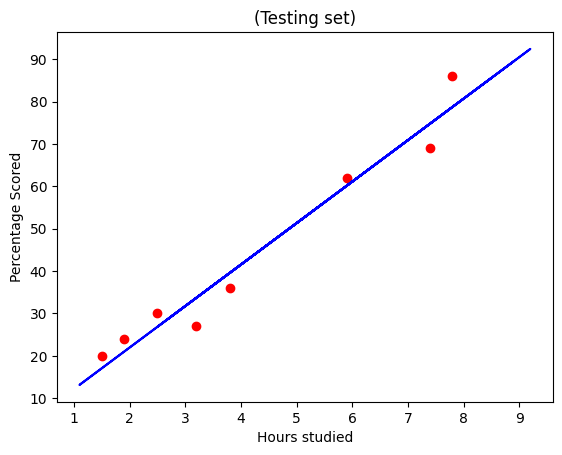

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Testing set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()

A

### **ACCURACY OF THE MODEL:**

In [ ]:
print("Train : ",regressor.score(X_train,y_train)*100)
print("Test : ",regressor.score(X_test,y_test)*100)

Train :  94.84997422695115
Test :  95.85637663439228


### **Prediction of the score for 9.25 Hours**

In [ ]:
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056
